<a href="https://colab.research.google.com/github/SathwikHegde/DataScienceFinalProject/blob/main/WaterQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from math import floor,ceil
import tabulate as tb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv('TexasWaterQuality.csv')

In [86]:
df.head()

,pH,Hardness,Solids,Sulfate,Conductivity,Organic carbon,Trihalomethanes,Turbidity,Potability
0,6.6,129.0,390.00,42.9,650.0,12.00,0.2,1.0,1
1,8.1,810.0,0.53,622.0,687.0,0.41,0.4,4.8,0
2,8.3,101.0,367.00,15.4,650.0,1.44,NaN,26.0,1
3,7.7,129.0,372.00,30.9,532.0,0.42,NaN,4.5,0
4,8.4,124.0,0.50,31.9,557.0,8.40,NaN,6.9,1


In [87]:
df.columns

Index(['pH', 'Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic carbon',
       'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [88]:
df.shape

(11518, 9)

In [89]:
df.isnull().sum().sort_values(ascending=False)

Trihalomethanes    11516
Turbidity          10309
Conductivity       10181
Organic carbon     10050
Hardness            9930
Sulfate             9271
Solids              8579
pH                     0
Potability             0
dtype: int64

In [90]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
Trihalomethanes,Trihalomethanes,99.982636
Turbidity,Turbidity,89.503386
Conductivity,Conductivity,88.392082
Organic carbon,Organic carbon,87.254732
Hardness,Hardness,86.212884
Sulfate,Sulfate,80.491405
Solids,Solids,74.483417
pH,pH,0.000000
Potability,Potability,0.000000


In [91]:
# df[:] = SimpleImputer(strategy='median').fit_transform(df) --Fill null values method 1

In [92]:
#Fill null values method 2
df.fillna(df.mean(),)

,pH,Hardness,Solids,Sulfate,Conductivity,Organic carbon,Trihalomethanes,Turbidity,Potability
0,6.6,129.000000,390.000000,42.900000,650.000000,12.00000,0.2,1.000000,1
1,8.1,810.000000,0.530000,622.000000,687.000000,0.41000,0.4,4.800000,0
2,8.3,101.000000,367.000000,15.400000,650.000000,1.44000,0.3,26.000000,1
3,7.7,129.000000,372.000000,30.900000,532.000000,0.42000,0.3,4.500000,0
4,8.4,124.000000,0.500000,31.900000,557.000000,8.40000,0.3,6.900000,1
...,...,...,...,...,...,...,...,...,...
11513,8.1,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209,1
11514,7.7,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209,1
11515,7.8,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209,0
11516,7.5,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209,1


In [93]:
# df.isnull().sum().sort_values(ascending=False)
df=df.fillna(df.mean())

In [94]:
 df.isnull().sum().sort_values(ascending=False)

pH                 0
Hardness           0
Solids             0
Sulfate            0
Conductivity       0
Organic carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [95]:
### checking if we need to perform dimensionality reduction

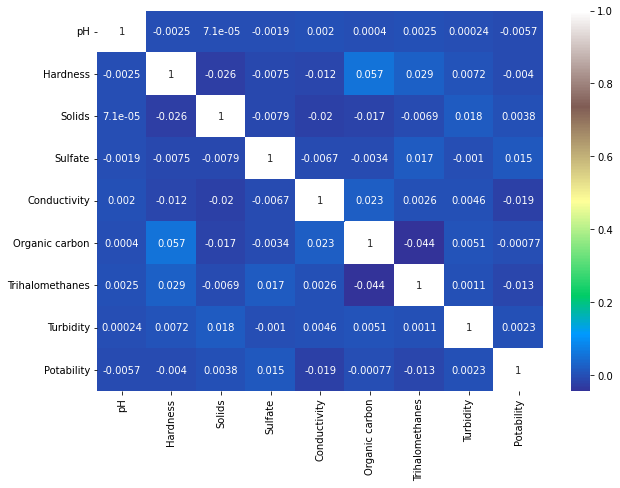

In [96]:
#Checking corealtion
sns.heatmap(df.corr(),annot=True, cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

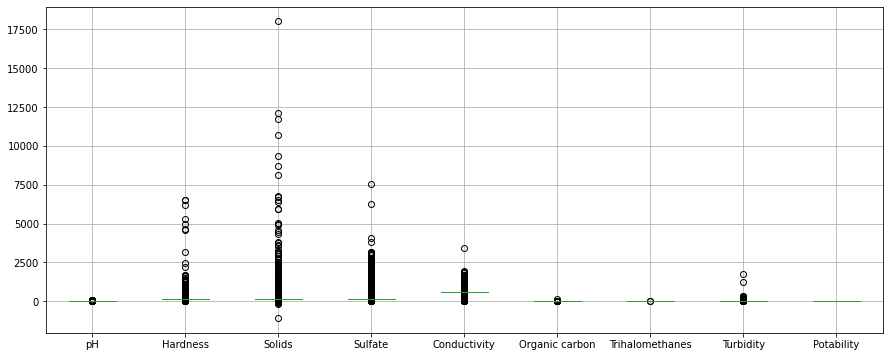

In [97]:
# cehck outliers using boxplot
df.boxplot(figsize=(15,6))

In [98]:
df['Potability'].value_counts()

1    5775
0    5743
Name: Potability, dtype: int64

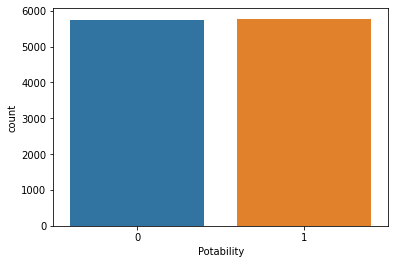

In [99]:
sns.countplot(df['Potability'])
plt.show()

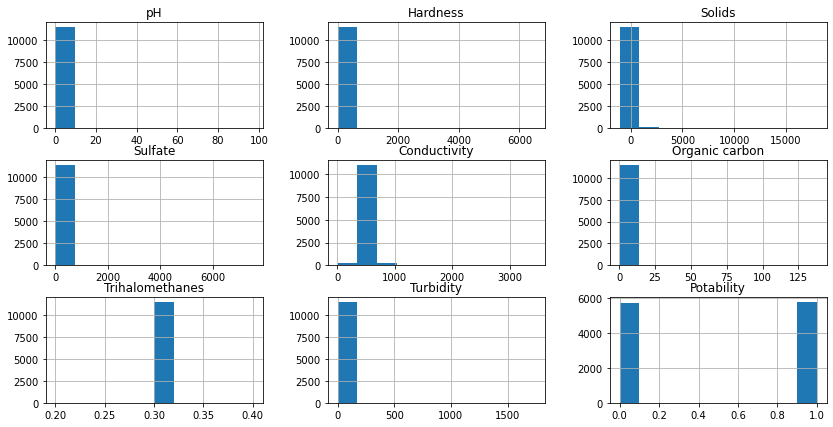

In [100]:
#checking biased data
df.hist(figsize=(14,7))
plt.show()

Since in the above graph it is one sided we need to perform normalizzation before we move ahead

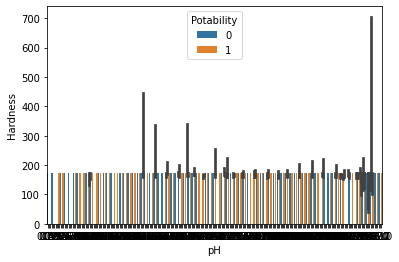

In [101]:
sns.barplot(x=df['pH'],
            y=df['Hardness'],
            hue=df['Potability'])
plt.show()

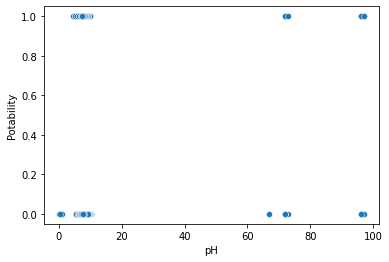

In [102]:
sns.scatterplot(x=df['pH'],
            y=df['Potability'])
plt.show()

In [103]:
#Normalization

In [104]:
#Partitioning

In [105]:
X=df.drop('Potability', axis=1) #Input Data


In [106]:
Y=df['Potability'] #Target Variable

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= None )

In [109]:
X_train

,pH,Hardness,Solids,Sulfate,Conductivity,Organic carbon,Trihalomethanes,Turbidity
9445,7.01,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209
3651,7.40,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209
10959,7.30,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209
10992,7.30,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209
737,7.80,44.000000,429.000000,108.000000,690.000000,6.00000,0.3,9.100000
...,...,...,...,...,...,...,...,...
2382,8.60,171.285579,35.000000,174.515723,571.545415,5.95515,0.3,20.383209
4810,8.00,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209
6955,7.30,171.285579,168.303015,174.515723,571.545415,5.95515,0.3,20.383209
903,8.20,101.000000,2170.000000,35.600000,565.000000,4.00000,0.3,3.300000


In [110]:
#Model Training
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()



In [111]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [113]:
Y_test

10629    0
3587     1
3525     1
1334     0
1558     1
        ..
2052     1
11506    0
5950     1
8806     0
824      0
Name: Potability, Length: 2304, dtype: int64

In [115]:
Y_prediction= dt.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
accuracy_score(Y_prediction,Y_test)

0.4973958333333333

In [121]:
confusion_matrix(Y_prediction,Y_test)

array([[634, 673],
       [485, 512]])

In [122]:
Y_test.shape

(2304,)

Model Optimization / Hyper Parameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt=DecisionTreeClassifier()
criterion = ["gini", "entropy"]

In [141]:
splitter = ['best','random']

In [146]:
min_samples_split=range(1,10)

In [147]:
parameters = dict(criterion=criterion, splitter=splitter, min_samples_split=min_samples_split)

In [148]:
#crossvalidation
cv= RepeatedStratifiedKFold(n_splits = 5, random_state = 101)
grid_search_cv_dt= GridSearchCV(estimator=dt, param_grid=parameters, scoring='accuracy', cv=cv)

In [149]:
grid_search_cv_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [150]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'gini', 'min_samples_split': 5, 'splitter': 'best'}


In [151]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [155]:
accuracy_score(Y_test,prediction_grid) * 100 

50.260416666666664

Accuracy increased

In [156]:
confusion_matrix(Y_prediction,Y_test)

array([[634, 673],
       [485, 512]])